# Real Estate Listing Analysis

**Source:** Data from Yandex.Realty — an archive of apartment sale listings in Saint Petersburg and neighboring areas over several years.

**Goal:** Establish parameters for determining the market value of real estate properties.

**Columns:**

- airports_nearest — distance to the nearest airport in meters (m)
- balcony — number of balconies
- ceiling_height — ceiling height (m)
- cityCenters_nearest — distance to the city center (m)
- days_exposition — number of days the listing was active (from publication to removal)
- first_day_exposition — publication date
- floor — floor number
- floors_total — total number of floors in the building
- is_apartment — apartments (boolean type)
- kitchen_area — kitchen area in square meters (m²)
- last_price — price at the time of removal from publication
- living_area — living area in square meters (m²)
- locality_name — name of the locality
- open_plan — open plan layout (boolean type)
- parks_around3000 — number of parks within a radius of 3 km
- parks_nearest — distance to the nearest park (m)
- ponds_around3000 — number of bodies of water within a radius of 3 km
- ponds_nearest — distance to the nearest body of water (m)
- rooms — number of rooms
- studio — studio apartment (boolean type)
- total_area — total area of the apartment in square meters (m²)
- total_images — number of photographs of the apartment in the listing

## Primary data analysis

In [3]:
# library imports
import pandas as pd
import matplotlib as mb
import numpy as np
from termcolor import colored
from decimal import Decimal
import matplotlib.pyplot as plt

In [4]:
# creating dataframe
data = pd.read_csv('C:/Users/as100/Documents/Portfolio/real_estate_data.csv',sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


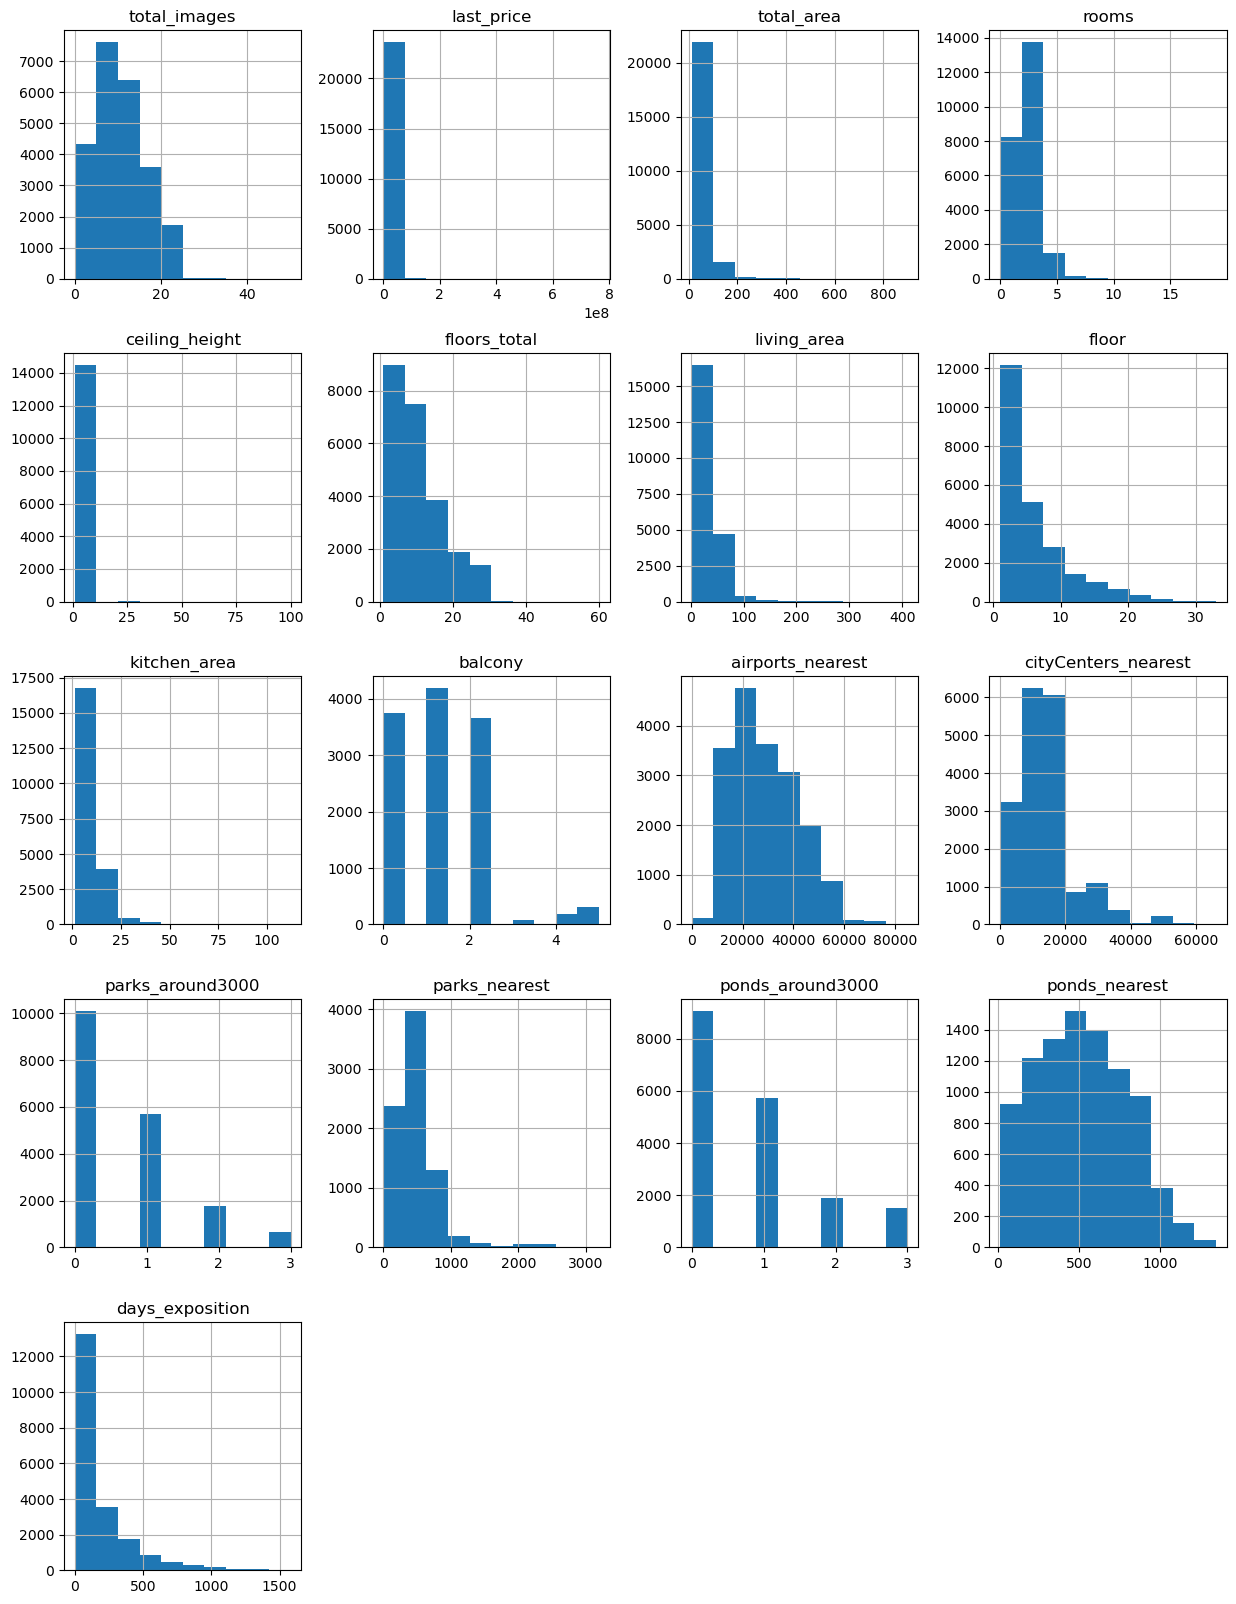

In [5]:
# histogram
data.hist(figsize=(15, 20));

In [6]:
# main info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Conclusion:** 
The data analysis revealed that the DataFrame contains a total of 23699 rows. The data has several issues: missing values and incorrect data types. There are no missing values in only 8 out of 21 columns, and values need to be converted in 8 out of 21 columns. For example, in the column *first_day_exposition*, the type needs to be changed to date since the date in object format may not be usable in all calculations. Additionally, integer values recorded as int are more readable than in float format.

## Data preprocessing

In [9]:
# NAs detection
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# filling zero values in the room column. Zeros can distort the data at the calculation and visualization stage, so we take the minimum
data['rooms'] = data['rooms'].replace(0, 1)

In [11]:
# eliminating some gaps
data[['balcony', 'ponds_around3000', 'parks_around3000']] = data[['balcony', 'ponds_around3000', 'parks_around3000']].fillna(0)
data['locality_name'] = data['locality_name'].fillna('No_data')
data['is_apartment'] = data['is_apartment'].fillna(0)

# filling ceiling height by average (ceilings usually do not differ much in apartments, so can be filled without grouping)
data['ceiling_height'] = data['ceiling_height']. fillna(data['ceiling_height'].mean())

In [12]:
# filling floors_total by average value depending on the region - for example, in a village there will be approximately the same number of floors
# also considering that filled value cannot exceed total floors count (per building)
data['floors_total'] = data.groupby('locality_name')['floors_total'].transform(lambda x: x.fillna(x.mean()))
data['floors_total'] = round(data['floors_total'])
data.loc[data['floor'] > data['floors_total'], 'floors_total'] = data['floor']

filtered_data = data[data['floor'] > data['floors_total']]
total_count = filtered_data['total_area'].count()
print(colored('Rows where value exceeds total count: ' + str(total_count), 'magenta'))

Rows where value exceeds total count: 0


In [13]:
# if it's apartment, then living area and kitchen = total area. otherwise we divide the total area by the number of rooms and fill in the blanks
data.loc[data['is_apartment'] == True, 'living_area'] = data.loc[data['is_apartment'] == True, 'living_area'].fillna(data.loc[data['is_apartment'] == True, 'total_area'])
data.loc[data['is_apartment'] == True, 'kitchen_area'] = data.loc[data['is_apartment'] == True, 'kitchen_area'].fillna(data.loc[data['is_apartment'] == True, 'total_area'])

data.loc[data['is_apartment'] == False, 'living_area'] = data.loc[data['is_apartment'] == False, 'living_area'].fillna(data.loc[data['is_apartment'] == False, 'total_area'] / data.loc[data['is_apartment'] == False, 'rooms'])
data.loc[data['is_apartment'] == False, 'kitchen_area'] = data.loc[data['is_apartment'] == False, 'kitchen_area'].fillna(data.loc[data['is_apartment'] == False, 'total_area'] / data.loc[data['is_apartment'] == False, 'rooms'])

In [14]:
# filling airports, city centers, parks and ponds depending on locality by the average value 
data.loc[data['locality_name'] != 'Санкт-Петербург', 'airports_nearest'] = data.loc[data['locality_name'] != 'Санкт-Петербург', 'airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('mean'))
data.loc[data['locality_name'] == 'Санкт-Петербург', 'airports_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('mean'))
data['airports_nearest'] = data['airports_nearest'].fillna(0)

data.loc[data['locality_name'] != 'Санкт-Петербург', 'cityCenters_nearest'] = data.loc[data['locality_name'] != 'Санкт-Петербург', 'cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'))
data.loc[data['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'))
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

data.loc[data['locality_name'] != 'Санкт-Петербург', 'parks_nearest'] = data.loc[data['locality_name'] != 'Санкт-Петербург', 'parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('mean'))
data.loc[data['locality_name'] == 'Санкт-Петербург', 'parks_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('mean'))
data['parks_nearest'] = data['parks_nearest'].fillna(0)

data.loc[data['locality_name'] != 'Санкт-Петербург', 'ponds_nearest'] = data.loc[data['locality_name'] != 'Санкт-Петербург', 'ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('mean'))
data.loc[data['locality_name'] == 'Санкт-Петербург', 'ponds_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('mean'))
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

<font color='teal'>***Why might the data have "disappeared"?***

I believe that all columns up to and including balcony were filled in by a person, while everything that follows was filled in automatically. Therefore, I will divide the possible reasons for missing values into two conditional groups.

1.1 Ordinary inattentiveness or unwillingness of a person to fill in data about the apartment. For example, ceiling height. Obviously, every apartment has a ceiling. However, measuring it is not very convenient; one has to climb up and get a ladder. I think 9195 out of 23699 (39%) owners might have been too lazy to indicate the ceiling height.

1.2 A person did not fill in data that they did not consider necessary to complete. For example, if there is no balcony, the owner might skip this field. The same goes for "is_apartment"; if nothing is indicated, it is likely that they are not apartments, so we mark this as False.

2. The part of automatically gathered data does not have fully filled columns. This could be due to a technical error (for example: the number of days since the listing was posted by the owner) or a lack of mapping data. One can even see approximately the same number of missing values in the columns related to distance to the airport, city center, number of parks, and ponds; it is very likely that this is indeed due to a lack of mapping data.

3. I will separately highlight the column with the name of the district/region. It could have been filled in by either a person or a computer. The small number of missing values points more towards the first option; a person might simply not have provided this information. However, these data could also be collected automatically, as some criteria determine the distance from the house to significant places, meaning the location is known. In the second case, it could be a matter of a lack of mapping data.

In [16]:
# correcting data types
d = ['balcony','last_price','ponds_around3000', 'parks_around3000', 'floors_total', 'studio', 'open_plan']
for i in d:
    data[i]=data[i].astype(int)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  int32         
 11  open_plan             23699 non-null  int32         
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

<font color='teal'>***Why should we change the data type?***

1. The data type was changed from float to int in the columns with price values, the number of ponds nearby, the number of parks nearby, the number of floors and the number of balconies. Obviously, there cannot be fractional numbers here (the possibility of person setting price value accurately to the cent is quite low). While fractional numbers are almost indistinguishable from integers, they offer more possibilities since fractions do not support all arithmetic functions that int does.

2. The data type was changed from boolean to int for columns containing information about the correspondence to apartments, studios, and open-plan layouts, because it is much easier to perform calculations with int type.

3. In the column first_day_exposition data type was changed from object to datetime. Date and time sometimes need to be involved in arithmetic operations, which is impossible to perform with objects.

In [18]:
# searching for implict duplicates
print(colored('IMPLICT DUPLICATES', 'red'))
print()
for i in pd.Series(data['locality_name'].unique()).sort_values():
    print (i)
print()

# manually replacing same-meaning values and bringing to general form 
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'садоводческое некоммерческое', 'поселок станции'], ['городской поселок','садовое', 'поселок при железнодорожной станции'], regex=True)
) 

# checking if any duplicates left
print(colored('AFTER DUPLICATES ELIMINATING', 'green'))
print()
for i in pd.Series(data['locality_name'].unique()).sort_values():
    print (i)

IMPLICT DUPLICATES

No_data
Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
де

In [19]:
# artefacts disposal
col = pd.Series(data.columns)
for i in col:
    print(colored(i,'green'))
    print(data[i].max())
    print(data[i].min())
    print()

total_images
50
0

last_price
763000000
12190

total_area
900.0
12.0

first_day_exposition
2019-05-03 00:00:00
2014-11-27 00:00:00

rooms
19
1

ceiling_height
100.0
1.0

floors_total
60
1

living_area
494.1
2.0

floor
33
1

is_apartment
True
0

studio
1
0

open_plan
1
0

kitchen_area
494.1
1.3

balcony
5
0

locality_name
село Шум
No_data

airports_nearest
84869.0
0.0

cityCenters_nearest
65968.0
0.0

parks_around3000
3
0

parks_nearest
3190.0
0.0

ponds_around3000
3
0

ponds_nearest
1344.0
0.0

days_exposition
1580.0
1.0



**Conclusion:** As a result, we checked the data for implicit duplicates and eliminated them, and we also checked for any artifacts in the data. To exclude duplicates, we standardized the location features. Next, we examined the minimum and maximum values for each column to determine if they fall within the bounds of 'normal'.

## Adding new columns

In [22]:
# price per m2
data['price_m2'] = round(data['last_price'] / data['total_area'],2)

# exposition weekday
data['weekday_name'] = data['first_day_exposition'].dt.weekday

# exposition month
data['month_name'] = data['first_day_exposition'].dt.month

# exposition year
data['year_name'] = data['first_day_exposition'].dt.year

# floor type

def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'first'
    if floor == floors_total:
        return 'last'
    else:
        return 'other'

data['floor_type'] = data.apply(floor_type, axis = 1)

# kilometers to the city center 
data['cityCenters_nearest'] = round(data['cityCenters_nearest']/1000, 0)

## Detailed research part 

### Visualization of dataframe parameters

In [25]:
#total_area
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

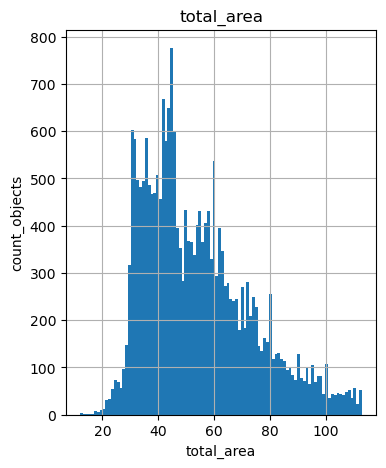

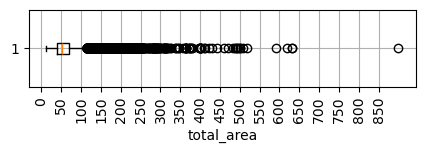

In [26]:
data['total_area'].hist(bins=100, grid=True, figsize=(4,5), range=(data['total_area'].min(),113))
plt.xlabel('total_area')
plt.ylabel('count_objects')
plt.title('total_area')
plt.show()

# anomaly detection
fig, ax = plt.subplots(figsize=(5, 1))
boxplot = ax.boxplot(data['total_area'], vert=False)
ax.set_xlabel('total_area')
ax.set_xticks(range(0, 900, 50))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [27]:
# anomaly elimination
data['total_area'] = data['total_area'].where((data['total_area'] <= 133) & (data['total_area'] >= 12))

<b>Conclusion:</b>
To build the histogram, we first checked the data for anomalies using the box plot method to determine the boundaries of 'normal' data. To filter out outliers and examine the histogram more closely, we set the boundaries within the range, specifically from 12 m² to 113 m². As a result, we obtained the following range of areas with the highest number of listings: from 30 to 45 m².

count    23699.000000
mean        34.313397
std         21.759765
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        494.100000
Name: living_area, dtype: float64


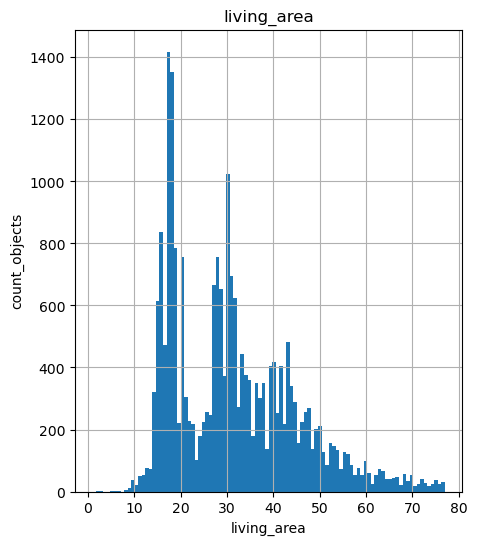

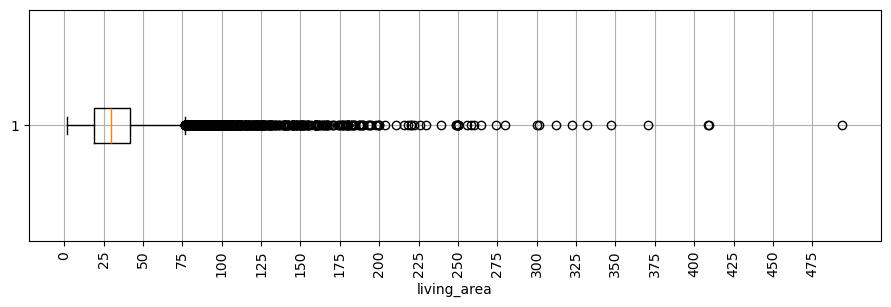

In [29]:
#living_area
print(data['living_area'].describe())
data['living_area'].hist(bins=100, grid=True, figsize=(5,6), range=(1,77))
plt.xlabel('living_area')
plt.ylabel('count_objects')
plt.title('living_area')
plt.show()

# anomaly detection 
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['living_area'], vert=False)
ax.set_xlabel('living_area')
ax.set_xticks(range(0, 495, 25))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [30]:
# anomaly elimination
data['living_area'] = data['living_area'].where((data['living_area'] <= 77) & (data['living_area'] >= 1))

<b>Conclusion:</b> When constructing the histogram, we used a similar method (see total_area above): we checked the data for anomalies using the box plot method. To filter out outliers and examine the histogram more closely, we set the boundaries within the range of 1 m² to 71 m². As a result, we obtained the following range of areas with the highest number of listings: from 15 to 19 m².

count    23699.00000
mean        12.54664
std          9.70864
min          1.30000
25%          7.40000
50%         10.00000
75%         13.50000
max        494.10000
Name: kitchen_area, dtype: float64


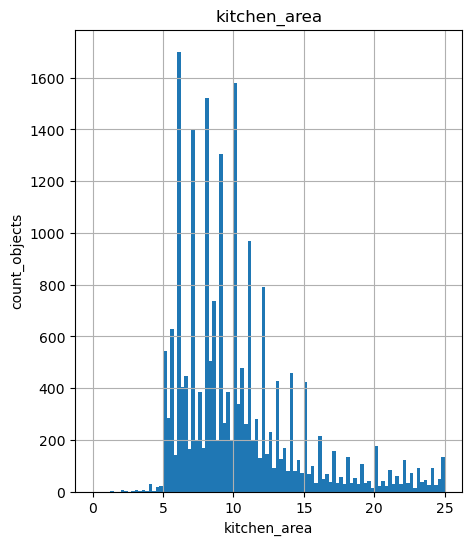

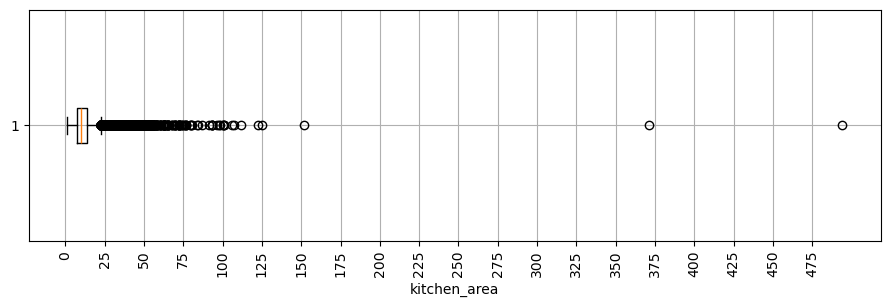

In [32]:
# kitchen_area
print(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=100, grid=True, figsize=(5,6), range=(0,25))
plt.xlabel('kitchen_area')
plt.ylabel('count_objects')
plt.title('kitchen_area')
plt.show()

# anomaly detection
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['kitchen_area'], vert=False)
ax.set_xlabel('kitchen_area')
ax.set_xticks(range(0, 495, 25))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [33]:
# anomaly elimination
data['kitchen_area'] = data['kitchen_area'].where((data['kitchen_area'] <= 25) & (data['kitchen_area'] >= 1))

<b>Conclusion: </b> All actions were conducted similarly to the previous ones. We obtained the following range of areas with the highest number of listings: from 7 to 12 m².

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


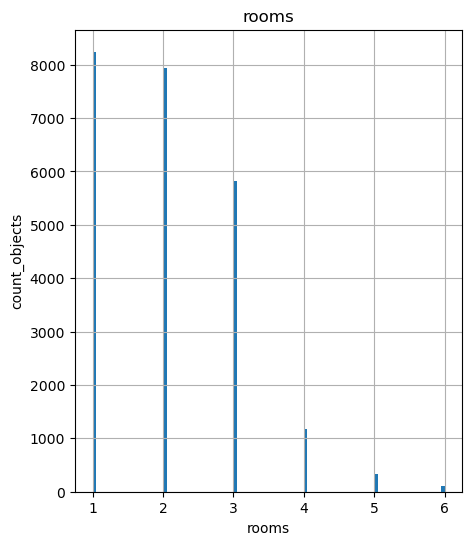

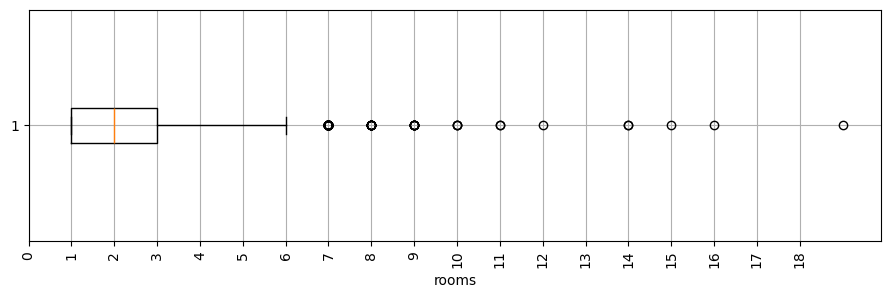

In [35]:
# rooms
print(data['rooms'].describe())
data['rooms'].hist(bins=100, grid=True, figsize=(5,6), range=(data['rooms'].min(),6))
plt.xlabel('rooms')
plt.ylabel('count_objects')
plt.title('rooms')
plt.show()

# anomaly detection
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['rooms'], vert=False)
ax.set_xlabel('rooms')
ax.set_xticks(range(0, 19, 1))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [36]:
# anomaly elimination
data['rooms'] = data['rooms'].where((data['rooms'] <= 6) & (data['rooms'] >= 1))

<b>Conclusion: </b> Having analyzed the parameter and eliminating the outliers from the field of view, we got the following result: the most numerous group of listings is the group with one-room apartments. The trend is smoothly decreasing without outbursts, which means that there are fewer listings for two-room apartments than for one-room apartments. And there are fewer ads for three-room apartments than for two-room apartments, etc.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


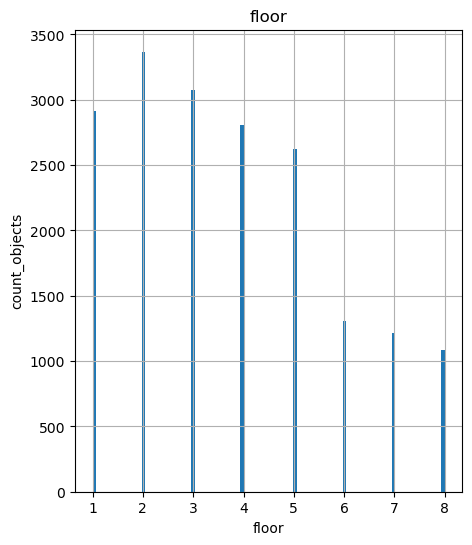

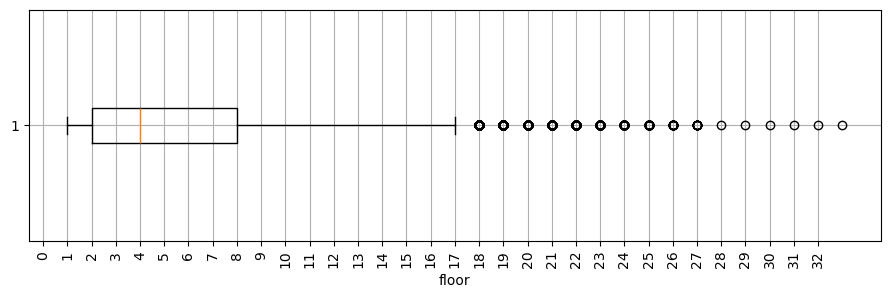

In [38]:
#floor
print(data['floor'].describe())
data['floor'].hist(bins=100, grid=True, figsize=(5,6), range=(data['floor'].min(),8))
plt.xlabel('floor')
plt.ylabel('count_objects')
plt.title('floor')
plt.show()

# anomaly detection
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['floor'], vert=False)
ax.set_xlabel('floor')
ax.set_xticks(range(0, 33, 1))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

<b>Conclusion:</b>The most popular among listings is the second floor, followed by the third floor in popularity, while the first floor takes third place. The number of listings on higher floors decreases; the higher the floor, the fewer listings are available.

count    23699.000000
mean        10.990717
std          9.649241
min          0.000000
25%          3.000000
50%         11.000000
75%         15.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64


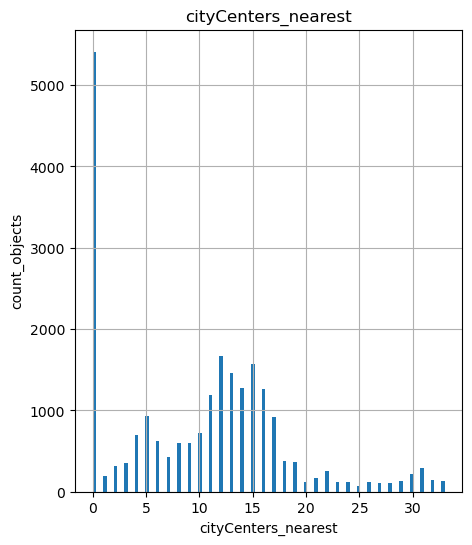

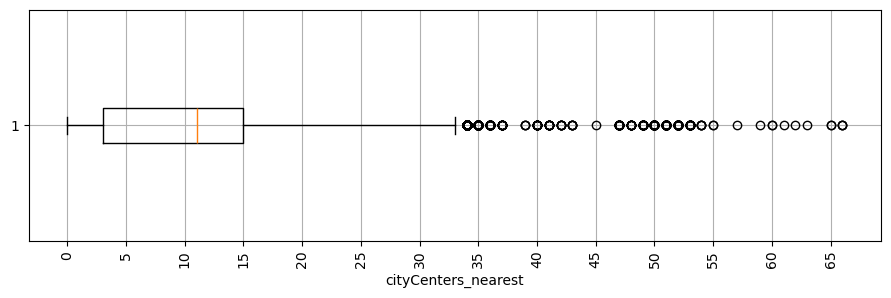

In [40]:
#cityCenters_nearest
print(data['cityCenters_nearest'].describe())
data['cityCenters_nearest'].hist(bins=100, grid=True, figsize=(5,6), range=(0,33))
plt.xlabel('cityCenters_nearest')
plt.ylabel('count_objects')
plt.title('cityCenters_nearest')
plt.show()

# anomaly detection
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['cityCenters_nearest'], vert=False)
ax.set_xlabel('cityCenters_nearest')
ax.set_xticks(range(0, 66, 5))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

<b>Conclusion:</b> The graph showing the number of listings based on proximity to the center resembles a Poisson distribution — we see a peak that rises to a certain level and then gradually starts to decline. There is an outlier at the value of 0, but we understand that this outlier results from removing missing values. This part of the graph can be ignored. It also becomes evident that some values might have been recorded incorrectly; it's hard to imagine a distance to the center of just 11 m. I suspect that the distances in this column are indicated in kilometers rather than meters. According to my understanding, there are the most listings with a distance to the center ranging from 11 km to 16 km.

count    23699.000000
mean       367.631245
std        293.195692
min          0.000000
25%          0.000000
50%        498.597886
75%        498.597886
max       3190.000000
Name: parks_nearest, dtype: float64


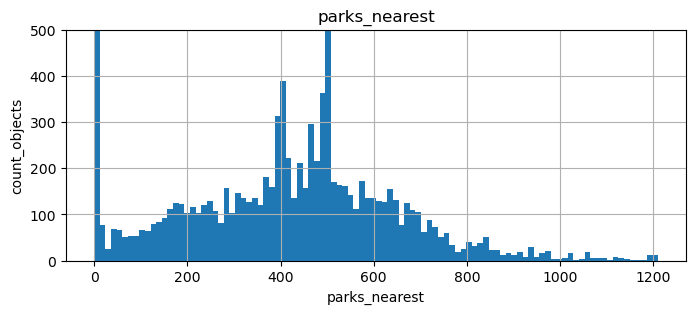

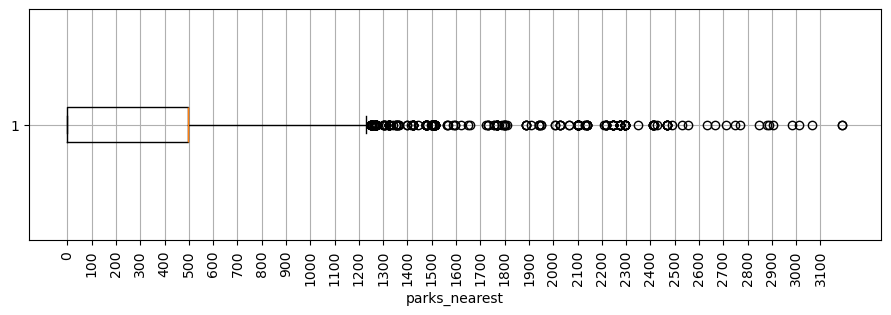

In [42]:
#parks_nearest
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=100, grid=True, figsize=(8,3), range=(data['parks_nearest'].min(),1210))
plt.xlabel('parks_nearest')
plt.ylabel('count_objects')
plt.ylim(0, 500) # trimming abnormally big values caused by gap filling
plt.title('parks_nearest')
plt.show()

# anomaly detection
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['parks_nearest'], vert=False)
ax.set_xlabel('parks_nearest')
ax.set_xticks(range(0, 3200, 100))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()


<b>Conclusion:</b> Examining the histogram, it is clear that the distance to parks follows a similar Poisson distribution. One column (~500 m) stands out here, which formed as a result of removing gaps in the data. The most numerous listings were those with a distance to the park ranging from 390 to 490 m. Such low values are hard to interpret as possible errors or convert into kilometers. However, they can be explained. Property owners might refer to any small park nearby, which exists in almost every courtyard.

count    23699.000000
mean         2.744938
std          0.235528
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max         10.000000
Name: ceiling_height, dtype: float64


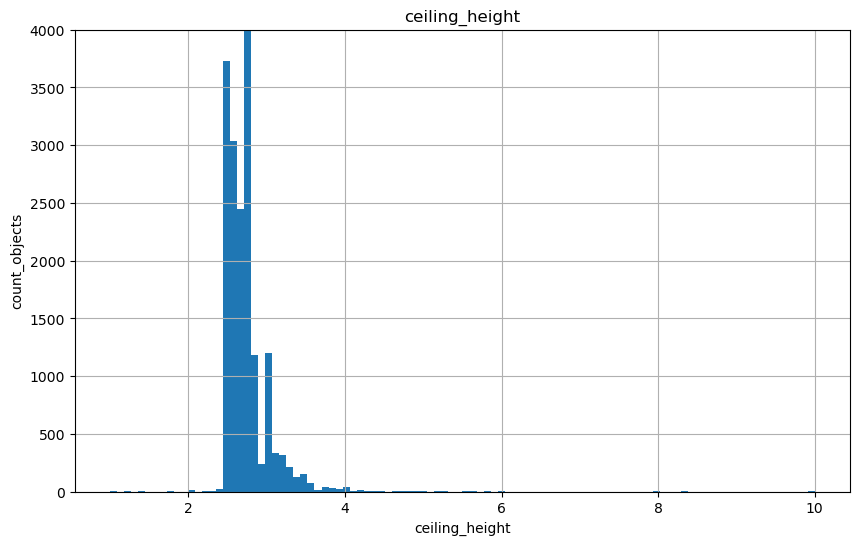

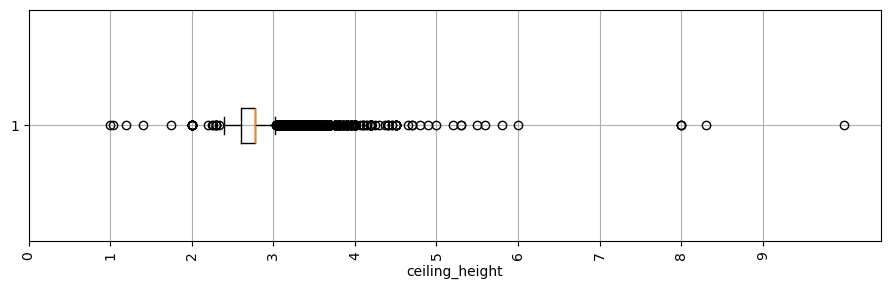

In [44]:
# eliminating abnormal ceiling values. Let's assume that 10-meters ceiling was actually a 1-meter
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] <= 10, data['ceiling_height'] / 10)

#ceiling_height
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=100, grid=True, range=(1,10), figsize=(10,6))
plt.xlabel('ceiling_height')
plt.ylim(0, 4000) # trimming abnormally big values caused by gap filling
plt.ylabel('count_objects')
plt.title('ceiling_height')
plt.show()

# anomaly detection
fig, ax = plt.subplots(figsize=(11, 3))
boxplot = ax.boxplot(data['ceiling_height'], vert=False)
ax.set_xlabel('ceiling_height')
ax.set_xticks(range(0, 10, 1))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()


<b>Conclusion:</b>
Anomalies in this column were addressed by considering ceilings above 10 meters as erroneous and dividing them by 10 to convert them into meaningful values. The most apartments sold have ceilings in the range of 2.3 - 3.0 m.

In [46]:
data['last_price'] = data['last_price']/1000000 # transforming price values to million

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


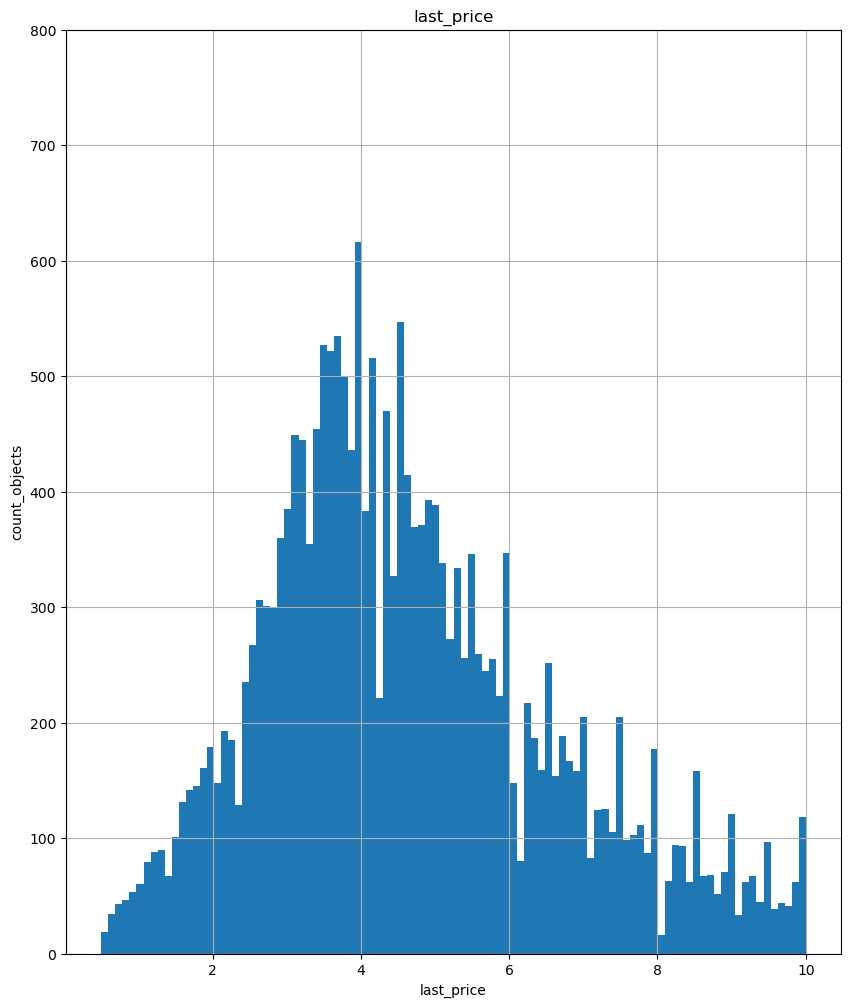

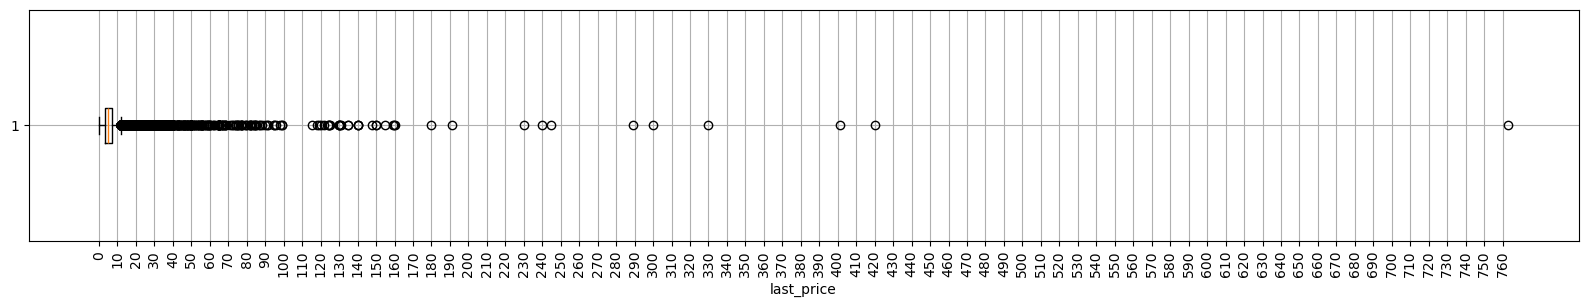

In [47]:
#last_price   
print(data['last_price'].describe())
data['last_price'].hist(bins=100, grid=True, figsize=(10,12), range=(0.5,10))
plt.xlabel('last_price')
plt.ylabel('count_objects')
plt.ylim(0, 800) 
plt.title('last_price')
plt.show()

fig, ax = plt.subplots(figsize=(20, 3))
boxplot = ax.boxplot(data['last_price'], vert=False)
ax.set_xlabel('last_price')
ax.set_xticks(range(0, 763, 10))
ax.tick_params(axis='x', labelrotation=90)
ax.grid(True)
plt.show()

In [48]:
# anomaly elimination
data['last_price'] = data['last_price'].where((data['last_price'] < 11) & (data['last_price'] > 0.4))

<b>Conclusion:</b> After removing anomalies, it became evident that the distribution of apartment prices resembles a Poisson distribution. The majority of apartments listed for sale are priced between 3 and 5 million.

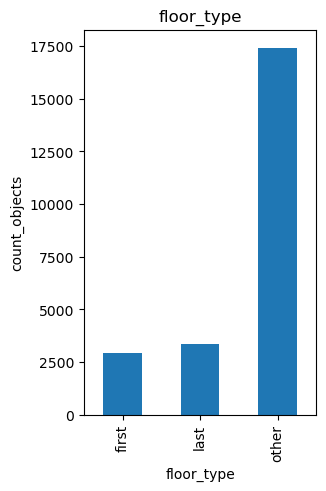

In [50]:
#floor_type
grouped_data = data.groupby('floor_type').size()
grouped_data.plot(kind='bar', figsize=(3, 5))
plt.xlabel('floor_type')
plt.ylabel('count_objects')
plt.title('floor_type')
plt.show()

<b>Conclusion:</b> The histogram shows that there are the fewest listings for apartments on the first floor. Accordingly, apartments on the top floor are listed for sale slightly more often. It is quite expected that the top listings come from apartments on the other floors.

In [52]:
# days_exposition
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

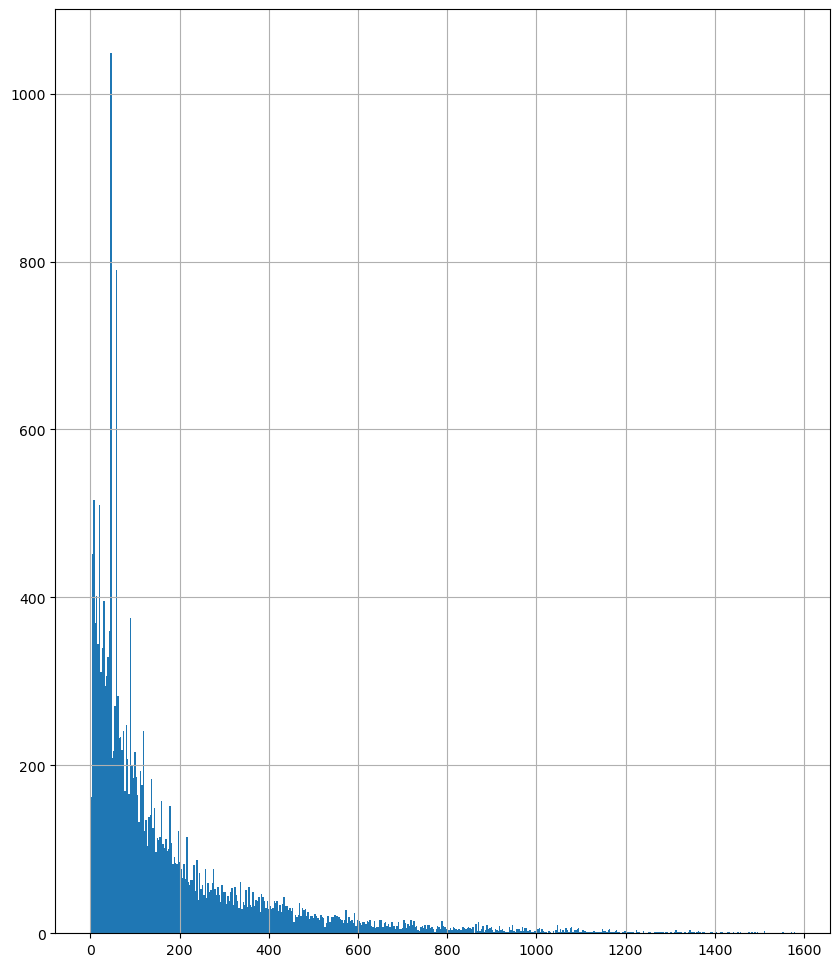

In [53]:
data['days_exposition'].hist(bins=500, range=(0,1580), figsize=(10,12))
plt.show()

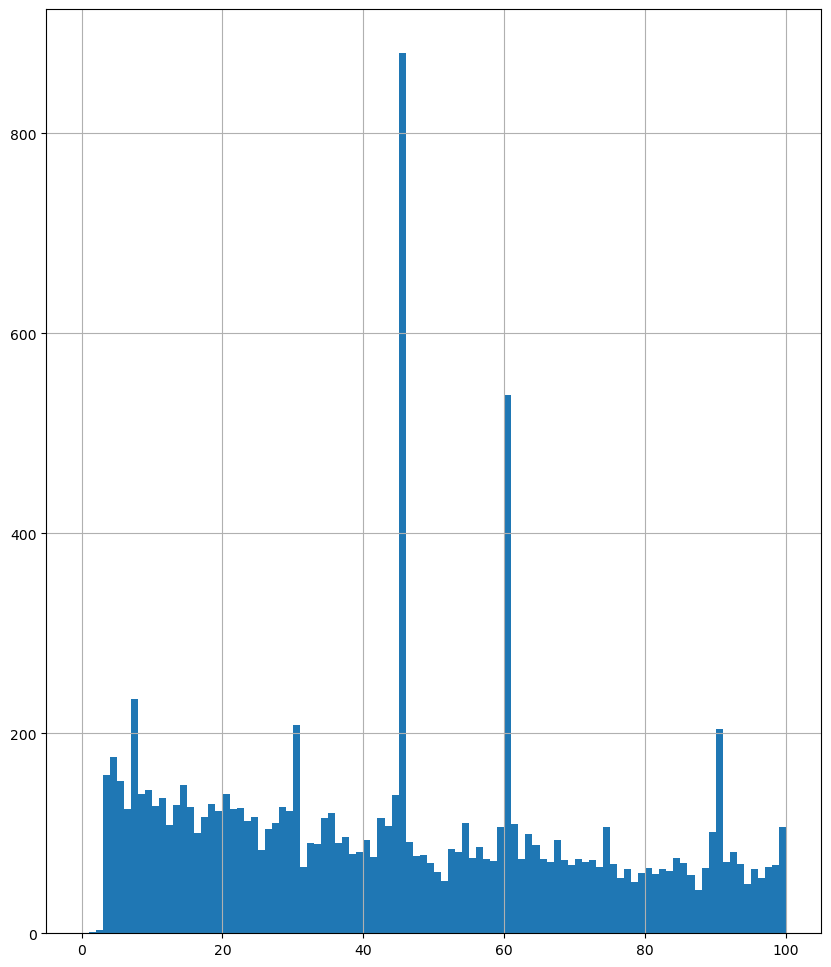

In [54]:
# Let's examine the outliers with a limit of 100 - there are several columns with suspiciously high values.
data['days_exposition'].hist(bins=100,range=(0,100), figsize=(10,12))
plt.show()

In [55]:
# There are outliers at values of 45 and 60 days. There are also small outliers at 30 and 90 days. 
# It looks like they were automatically closed (technical error?). To determine this we need to clarify the information about the automatic closing system for listings. For now, I will simply exclude these values from the calculations.

print('Median: ' + str(data.loc[~data['days_exposition'].isin([30, 45, 60, 90]), 'days_exposition'].median()))
print('Average: ' + str(data.loc[~data['days_exposition'].isin([30, 45, 60, 90]), 'days_exposition'].mean()))

Median: 102.0
Average: 185.76537527817115


**Conclusion:** The histogram shows that the selling period gradually "calms down." Outliers here can be considered those values that resemble automatic closures. Otherwise, the trend is that a larger number of sales occur within 200 days, while there are listings that were closed after 1580 days (4.3 years). However, since the histogram does not appear deceptive, I believe this is possible (for example, it could be a high-priced apartment in a village with no parks or ponds nearby, and half of the information in the listing is missing).

## Price's correlation with other parameters

Correlation with total area = 0.6859255896844013


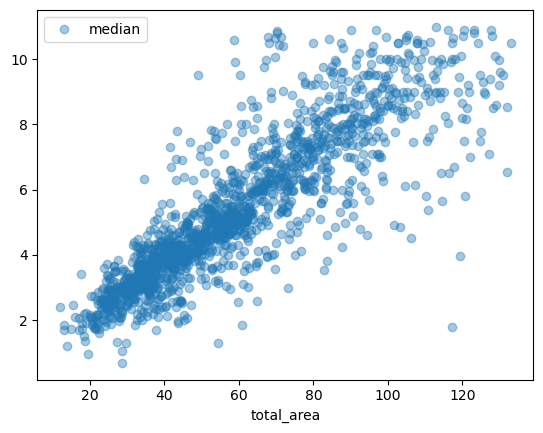

In [58]:
# total area
totar = data.groupby('total_area')['last_price'].agg(['mean', 'count', 'median']).rename(columns={'mean':'mean', 'count':'count', 'median':'median'})
totar.plot(y='median',style='o',alpha=0.4)
print('Correlation with total area = ' + str(data['total_area'].corr(data['last_price'])))
plt.show()

**Conclusion:** As the area increases, so does the price of the apartment. The correlation coefficient indicates that the area is 68% dependent on the price — the larger the area, the higher the price.

Correlation with living area = 0.5351564222289461


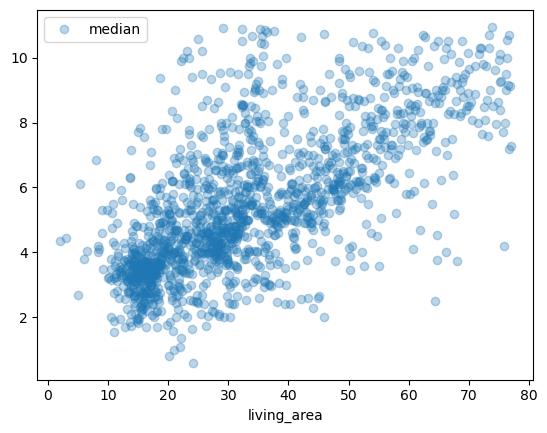

In [60]:
# living area
livar = data.groupby('living_area')['last_price'].agg(['mean', 'count', 'median']).rename(columns={'mean':'mean', 'count':'count', 'median':'median'})
livar.plot(y='median',style='o',alpha=0.3)
print('Correlation with living area = ' + str(data['living_area'].corr(data['last_price'])))
plt.show()

**Conclusion:** The story with living space is similar to that of total area, except that the correlation here is not 66%, but 53%. The figures could have been closer if we hadn't had to eliminate missing values in the total area.

Correlation with kitchen area = 0.3223015239611362


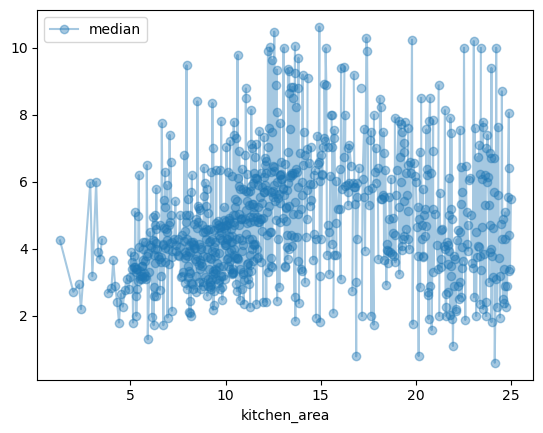

In [62]:
# kitchen area
kiar = data.groupby('kitchen_area')['last_price'].agg(['mean', 'count', 'median']).rename(columns={'mean':'mean', 'count':'count', 'median':'median'})
kiar.plot(y='median',style='o-',alpha=0.4)
print('Correlation with kitchen area = ' + str(data['kitchen_area'].corr(data['last_price'])))
plt.show()

**Conclusion:** The correlation with kitchen size is quite low — only 32%. This may be related to the fact that pricing is calculated in most cases based on total area or living space.

Correlation with rooms number = 0.4424346769479779


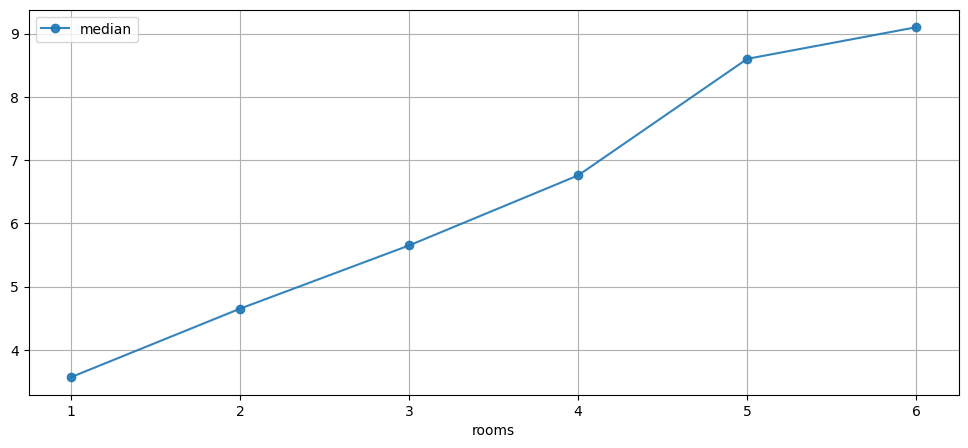

In [64]:
# rooms number
roo = data.groupby('rooms')['last_price'].agg(['mean', 'count', 'median']).rename(columns={'mean':'mean', 'count':'count', 'median':'median'})
roo.plot(y='median',alpha=0.9, figsize=(12,5), grid=True, style='o-')
print('Correlation with rooms number = ' + str(data['rooms'].corr(data['last_price'])))
plt.show()

**Conclusion:** In analyzing the correlation between price and the number of rooms, it is noticeable that part of the data was cut off due to filtering by apartment price. Thus, we calculated the correlation more accurately, and its coefficient is 44%.

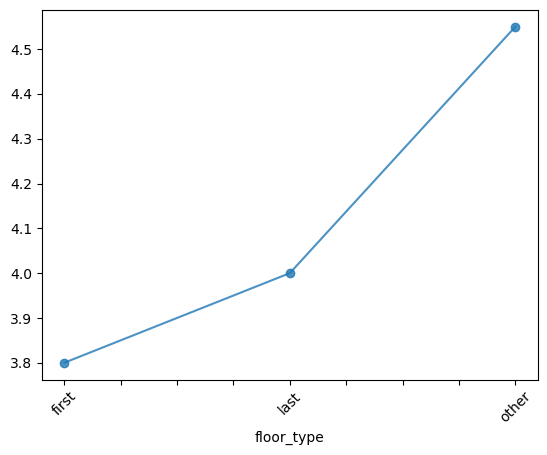

In [66]:
# floor type
floty = data.groupby('floor_type')['last_price'].agg('median')
floty.plot(y='count', style='o-', alpha=0.8)
plt.xticks(rotation=45)
plt.show()

**Conclusion:** It is not entirely correct to consider three types of floors on the graph. The sample with the type "other" is several times larger than the samples for the other types. If we compare the first and last floors, it is evident that the cheapest apartments are located on the first floor (which can be explained by their less comfortable location), while apartments on the last floor are, on average, 0.2 million more expensive than those on the first.

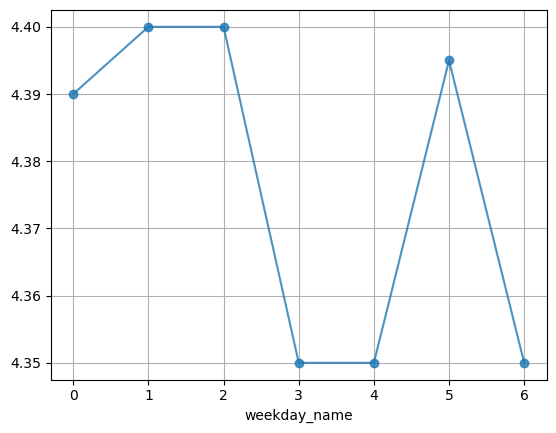

In [68]:
# date of exposion
dat = data.groupby('weekday_name')['last_price'].agg('median')
dat.plot(x='weekday_name', y='last_price', style='o-', grid=True, alpha=0.8) 
plt.show()

**Conclusion:** It is evident that from Monday to Wednesday apartment prices are set higher than those closer to the weekend. At the same time, there is no difference in the prices set in the second half of the week, while from Monday to Wednesday, apartment prices gradually increase, reaching their peak on Wednesday.

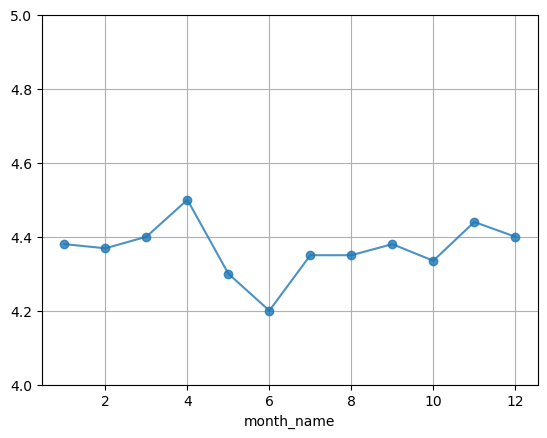

In [70]:
# publication month 
dat = data.groupby('month_name')['last_price'].agg('median')
dat.plot(x='month_name', y='last_price', ylim=(4, 5), style='o-', grid=True, alpha=0.8) 
plt.show()

**Conclusion:** The dependence of price on the month of publication shows that the lowest prices are set from May to October. The highest prices for apartments are in April, November and December.

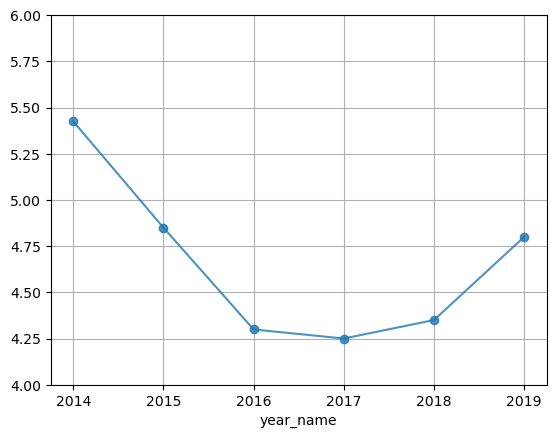

In [72]:
# publication year
dat = data.groupby('year_name')['last_price'].agg('median')
dat.plot(x='year_name', y='last_price', ylim=(4, 6), style='o-', grid=True, alpha=0.8) 
plt.show()

**Conclusion:** The highest prices were set in 2014-2015. Prices gradually decreased from 2014 to 2017. In 2017, there was a peak of the lowest average apartment price, after which prices began to rise until 2019.

In [74]:
# average price per m2 in TOP-10 localities by number of publications

local_gr = data.groupby('locality_name').agg({'floor': 'count', 'last_price': 'mean'})
local_srt = local_gr.sort_values('floor', ascending=False)
local_srt10 = local_srt.head(10)
top_pr = local_srt10['last_price'].idxmax()
low_pr = local_srt10['last_price'].idxmin()

print(local_srt10)
print()
print(colored('Locality with the highest cost per m2: ' + str(top_pr), 'green'))
print(colored('Locality with the lowest cost per m2: ' + str(low_pr), 'red'))

                   floor  last_price
locality_name                       
Санкт-Петербург    15721    5.552160
поселок Мурино       556    3.652361
поселок Шушары       440    4.108082
Всеволожск           398    3.718778
Пушкин               369    5.316534
Колпино              338    3.839849
поселок Парголово    327    4.488075
Гатчина              307    3.423998
деревня Кудрово      299    4.204742
Выборг               237    3.180055

Locality with the highest cost per m2: Санкт-Петербург
Locality with the lowest cost per m2: Выборг


**Conclusion:** We studied the cost per square meter in areas with the highest number of listings: As expected, St. Petersburg is in first place — it is the largest city among all locations and is considered the "second capital" of Russia. Naturally, prices there are the highest among the listings. Vyborg is less expensive. Price changes can be explained in various ways. Some locations are farther from St. Petersburg, while others are closer. The cost may depend on the overall condition of the apartment, its area, the number of floors in the building, etc.

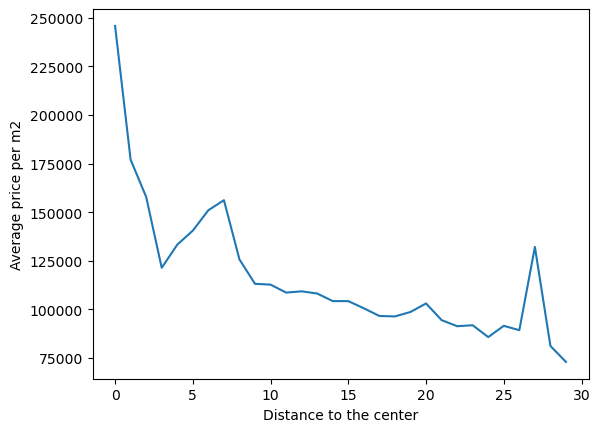

In [76]:
# Average price per km
grouped_data = data.loc[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest')['price_m2'].mean()
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Distance to the center')
plt.ylabel('Average price per m2')
plt.show()

**Conclusion:** We examined the average price per kilometer in St. Petersburg: everything is consistent — the closer the apartment is to the center, the more expensive it is, and vice versa.

## Final conclusion

- *Research Objective*:

To conduct an exploratory data analysis that will help to establish parameters influencing real estate prices.

- *Main conclusions*:

    1. There is a high correlation between apartment price and its area — 65%. This means that the area has a very strong influence on pricing.
    2. Another important factor is the location of the apartment. Accordingly, apartments in large cities are more expensive than those in smaller settlements.
    3. When considering an apartment within a large city, it is important to take into account its proximity to the city center — this also has a strong impact on apartment prices.
    4. The number of rooms in an apartment has a moderate influence on price. This can be explained by the fact that the area of the apartment stands for its size rather than the number of rooms. Therefore, having several tiny rooms cannot compete with large apartments.
    5. The floor on which the apartment is located does not significantly affect the price. The least popular are apartments on the first floor, therefore their prices are generally lower.
<div>

</div>

- *Data Description*:

The input data was provided by a bank — it is an archive of apartment sale listings in St. Petersburg and neighboring settlements over several years in CSV file format. The file contains information about apartments, such as:

1. Distance to the nearest airport in meters 
2. Number of balconies
3. Ceiling height 
4. Distance to the city center 
5. Number of days the listing was posted (from publication to removal)
6. Publication date
7. Floor
8. Total number of floors in the building
9. Apartments (boolean type)
10. Kitchen area in square meters 
11. Price at the time of removal from publication
12. Living area in square meters 
13. Name of the location
14. Free layout (boolean type)
15. Number of parks within a radius of 3 km
16. Distance to the nearest park 
17. Number of ponds within a radius of 3 km
18. Distance to the nearest pond
19. Number of rooms
20. Studio apartment (boolean type)
21. Total area of the apartment in square meters 
22. Number of photographs of the apartment in the ads

---

- *Processing Anomalies, Missing Values, and Duplicates:*

The data contained the following errors:

1. Missing values were found in such columns as: *ceiling height, number of floors, living area, apartment (boolean), kitchen area, presence of a balcony, location, distance to the airport, distance to the city center, number of parks nearby, distance to the nearest park, number of ponds nearby, distance to the nearest pond.* Missing values in these columns were filled in various ways:
<div>

</div>

1. Booleans, namely *apartment* and *balcony*, were replaced with False (i.e., zero).
2. The number of nearby parks and ponds was replaced with 0 based on the principle "not specified because they do not exist."
3. Ceiling height was filled with the average value since ceilings usually do not vary much in apartments and can be filled without grouping.
4. Number of floors was filled with average values by location since it cannot be calculated without grouping (in a large city, the average may be 18 floors, while in a village it might be 2 floors).
5. Living area and kitchen area were filled based on the "apartment" parameter. If it is a studio, then living area + kitchen = total area. Otherwise, we divide the total area by the number of rooms (considering the kitchen as a room).
6. The distance to the center, airport, pond, and park was filled with the average value by location, provided that it is not empty and not a large city (St. Petersburg). This strategy is suitable for small settlements. If the city is St. Petersburg, then we take the maximum value since it is a large city and it would be incorrect to indicate the average distance for an apartment that is several kilometers away from a park or pond. If none of the strategies were applicable and there were still missing values in the data, we acknowledge that there are no nearby objects and set it to 0.

<div>

</div>

3. Anomalies were detected in the "rooms" column - zero values were replaced with 1.
4. Implicit duplicates in the *locality name* column were removed by analyzing unique values and subsequently standardizing same-meaning names

---

- *Data Preprocessing:*

For analysis purposes, additional columns were added:

<div>

</div>

1. Price per square meter
2. Day of the week when the ad was published
3. Month of ad publication
4. Year of ad publication
5. Apartment floor type (values — "first", "last", or "other")
6. Distance to the city center in kilometers

---

- *Conducted Analysis:*

1. An investigation was conducted on parameters such as *total area, living area, kitchen area, property price, number of rooms, ceiling height, apartment floor type ("first", "last", "other"), total number of floors in the building, distance to the city center in meters* through histogram and using the describe() method.
2. The speed at which apartments sold (column days_exposition) was studied using a histogram based on median values.
3. The dependence of price on factors such as total area, living area, number of rooms, floor type, and date of publication was analyzed through graph construction and correlation calculation using the corr() method.
4. The average price per square meter in 10 locations with the highest number of ads was calculated by constructing a pivot table with the number of ads and average price per square meter for those settlements.
5. The average price for each kilometer to the city center in St. Petersburg was calculated, and a graph showing changes in average price for each kilometer from the center of St. Petersburg was constructed.